<a href="https://colab.research.google.com/github/sravanisaripalli6/Machine_learning/blob/main/restaurantrevi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Import dataset with setting delimiter as ‘\t’ as columns are separated as tab space. Reviews and their category(0 or 1) are not separated by any other symbol but with tab space as most of the other symbols are is the review (like $ for the price, ….!, etc) and the algorithm might use them as a delimiter, which will lead to strange behavior (like errors, weird output) in output. 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Restaurant_Reviews.tsv to Restaurant_Reviews.tsv


In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd

# Import dataset
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t')


Step 2: Text Cleaning or Preprocessing 
Remove Punctuations, Numbers: Punctuations, Numbers don’t help much in processing the given text, if included, they will just increase the size of a bag of words that we will create as the last step and decrease the efficiency of an algorithm.
Stemming: Take roots of the word 
Convert each word into its lower case: For example, it is useless to have some words in different cases (eg ‘good’ and ‘GOOD’).

In [ ]:
dataset.shape

(1000, 2)

In [ ]:
# library to clean data
import re

# Natural Language Tool Kit
import nltk

nltk.download('stopwords')

# to remove stopword
from nltk.corpus import stopwords

# for Stemming propose
from nltk.stem.porter import PorterStemmer

# Initialize empty array
# to append clean text
corpus = []

# 1000 (reviews) rows to clean
for i in range(0, 1000):
	
	# column : "Review", row ith
	review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
	
	# convert all cases to lower cases
	review = review.lower()
	
	# split to array(default delimiter is " ")
	review = review.split()
	
	# creating PorterStemmer object to
	# take main stem of each word
	ps = PorterStemmer()
	
	# loop for stemming each word
	# in string array at ith row
	review = [ps.stem(word) for word in review
				if not word in set(stopwords.words('english'))]
				
	# rejoin all string array elements
	# to create back into a string
	review = ' '.join(review)
	
	# append each string to create
	# array of clean text
	corpus.append(review)
print(corpus[:10])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['wow love place', 'crust good', 'tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch']


Step 3: Tokenization, involves splitting sentences and words from the body of the text.

Step 4: Making the bag of words via sparse matrix
 

Take all the different words of reviews in the dataset without repeating of words.
One column for each word, therefore there is going to be many columns.
Rows are reviews
If a word is there in the row of a dataset of reviews, then the count of the word will be there in the row of a bag of words under the column of the word.


In [ ]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer

# To extract max 1500 feature.
# "max_features" is attribute to
# experiment with to get better results
cv = CountVectorizer(max_features = 1500)

# X contains corpus (dependent variable)
X = cv.fit_transform(corpus).toarray()

# y contains answers if review
# is positive or negative
y = dataset.iloc[:, 1].values


Step 5: Splitting Corpus into Training and Test set. For this, we need class train_test_split from sklearn.cross_validation. Split can be made 70/30 or 80/20 or 85/15 or 75/25, here I choose 75/25 via “test_size”. 
X is the bag of words, y is 0 or 1 (positive or negative).

In [ ]:
# Splitting the dataset into
# the Training set and Test set
from sklearn.model_selection import train_test_split

# experiment with "test_size"
# to get better results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

Step 6: Fitting a Predictive Model (here random forest) 
 

Since Random forest is an ensemble model (made of many trees) from sklearn.ensemble, import RandomForestClassifier class
With 501 trees or “n_estimators” and criterion as ‘entropy’
Fit the model via .fit() method with attributes X_train and y_train


In [ ]:
# Fitting Random Forest Classification
# to the Training set
from sklearn.ensemble import RandomForestClassifier

# n_estimators can be said as number of
# trees, experiment with n_estimators
# to get better results
model = RandomForestClassifier(n_estimators = 501,
							criterion = 'entropy')
							
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=501)

Step 7: Predicting Final Results via using .predict() method with attribute X_test 

In [ ]:
from sklearn.metrics import accuracy_score
# Predicting the Test set results
y_pred = model.predict(X_test)

#model accuracy
print(accuracy_score(y_test,y_pred))


0.732


Note: Accuracy with the random forest was 72%.(It may be different when performed an experiment with different test sizes, here = 0.25).
Step 8: To know the accuracy, a confusion matrix is needed.
Confusion Matrix is a 2X2 Matrix.
 

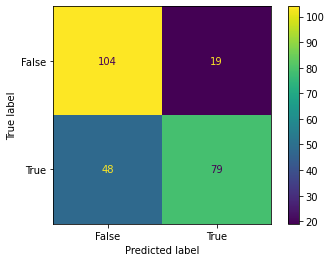

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = [False, True])
cm_display.plot()
plt.show()